# Procesamiento del lenguaje

El lenguaje siempre ha sido un recurso esquivo a la hora de poder interpretarlo y conseguir representar un vector numérico que capte todo lo que contiene la lengua escrita o hablada:

* Contexto social
* Desambiaguación de términos
* Reconocimiento de entidades

Existen librerías específicas en las que se engloba gran parte de la práctica tradicional sobre cómo trabajamos el lenguaje:

* [Spacy](https://spacy.io/) y [Textacy](https://textacy.readthedocs.io/en/latest/)
* [NLTK](https://www.nltk.org/) con una buena referencia al ámbito: https://www.nltk.org/book/

Hay que entender cómo de primeras el texto requiere de pasos de limpieza como son:

* Normalización
* Tokenización
* Eliminación de palabras sin aporte (Stopwords)
* Stemming/Lemmatización
* Vectorización

Tomaremos como ejemplo los textos de spam en la carpeta _data_ para ilustrar el proceso.

In [ ]:
import pandas as pd

data = pd.read_csv('data/spam/SMSSpamCollection.txt', sep='\t', header=None, names=["label", "sms"])
data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# !pip install seaborn

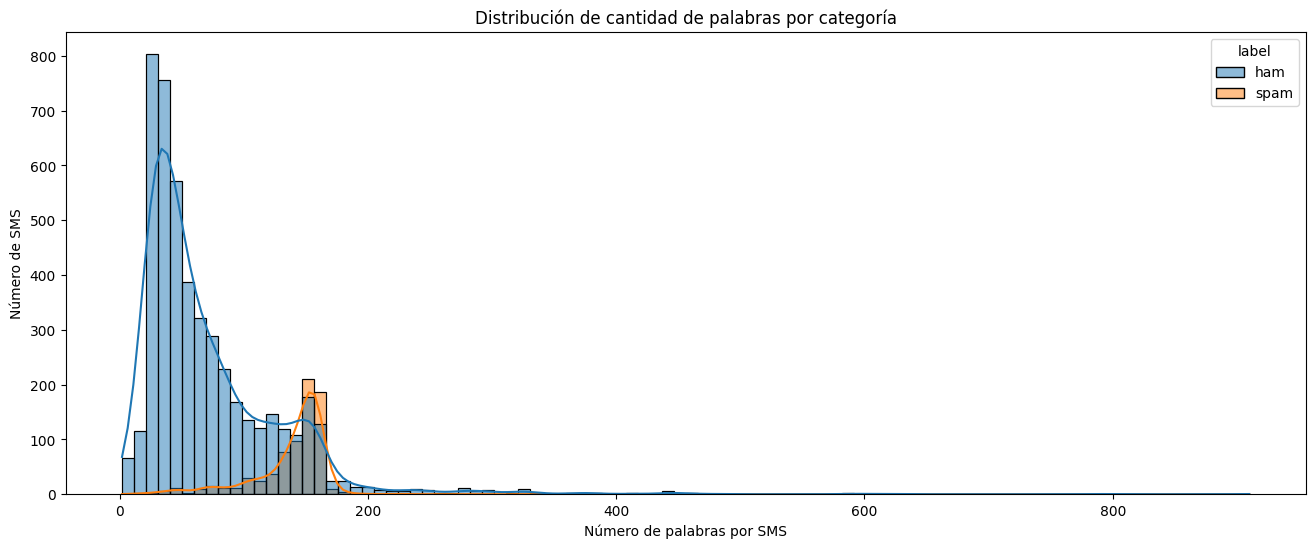

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

edaData = data.copy()
edaData['NumWords'] = edaData['sms'].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize=(16,6))
sns.histplot(data=edaData, x='NumWords',hue='label',kde=True,ax=ax)
ax.set_xlabel('Número de palabras por SMS')
ax.set_ylabel('Número de SMS')
ax.set_title('Distribución de cantidad de palabras por categoría')
plt.show()

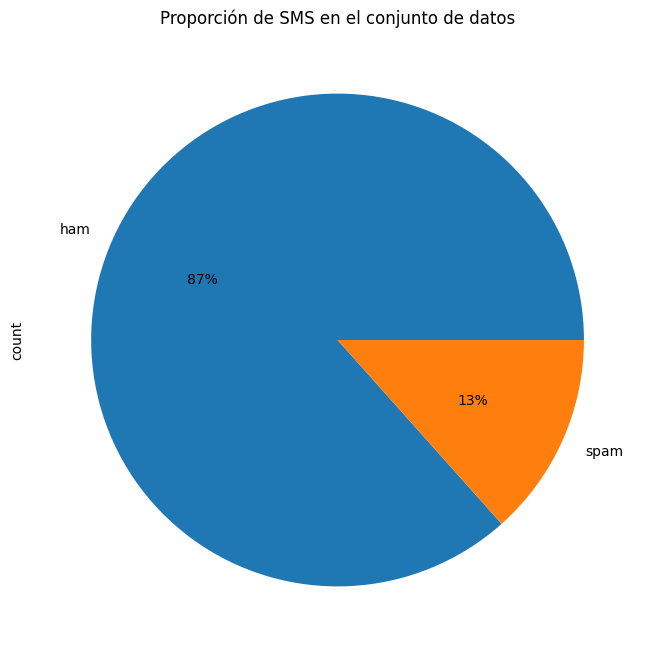

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
edaData['label'].value_counts().plot(
    kind='pie',
    title='Proporción de SMS en el conjunto de datos',
    autopct = '%1.0f%%',
    ax=ax
)
plt.show()

In [7]:
# !pip install nltk

In [8]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/iraitz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/iraitz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from nlp import Preprocess

preproc = Preprocess()
enc_data, label = preproc.fit_transform(data['sms'], data['label'])

Con estos números ya podemos realizar tareas de clasificación o _entendimiento_ del texto. Lo malo que al ser una codificación basada en vocabulario, nuestros datos de entrada quedan muy largos.

In [14]:
len(enc_data[0])

8404

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(enc_data, label)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
logreg.score(enc_data, label)

0.9721823402727925

Estos números contienen una representación basada en un vocabulario construído a partir de nuestro texto original, pero en el caso general deberémos construir un vocabulario para toda la lengua, y que represente de forma densa cada potencial frase o palabra empleada.

## Representación del texto como números

Los modelos de aprendizaje automático toman vectores (matrices de números) como entrada. Cuando se trabaja con texto, lo primero que hay que hacer es idear una estrategia para convertir las cadenas en números (o «vectorizar» el texto) antes de introducirlo en el modelo. En esta sección, veremos tres estrategias para hacerlo.

### 1. Codificaciones de una sola vez

Una de las aproximaciones más simples es codificar «una sola vez» cada palabra de su vocabulario. Piensa en la frase «El gato se sentó en la alfombra». El vocabulario (o las palabras únicas) de esta frase es (gato, colchoneta, sobre, se sentó, el). Para representar cada palabra, se crea un vector cero con una longitud igual a la del vocabulario y, a continuación, se coloca un uno en el índice correspondiente a la palabra.

Para crear un vector que contenga la codificación de la frase, se trata unicamente de concatenar los 1s.

**Punto clave**: Un vector codificado con una sola palabra es disperso (es decir, la mayoría de los índices son cero). Imagina que tienes 10.000 palabras en el vocabulario. Para codificar cada palabra de una sola vez, tendría que crear un vector en el que el 99,99% de los elementos fueran cero

### 2. Codificar cada palabra con un número único

Una segunda posibilidad es codificar cada palabra con un **número único**. Continuando con el ejemplo anterior, podrías asignar 1 a «gato», 2 a «alfombrilla», y así sucesivamente. Así, podrías codificar la frase «El gato se sentó en la alfombra» como un vector denso del tipo [5, 1, 4, 3, 5, 2]. Este método es eficaz. En lugar de un vector disperso, ahora tenemos uno denso (en el que todos los elementos están llenos).

Sin embargo, este método tiene dos inconvenientes:

* La codificación entera es arbitraria (no captura ninguna relación entre palabras).

* Una codificación entera puede ser difícil de interpretar para un modelo. Un clasificador lineal, por ejemplo, aprende un único peso para cada característica. Dado que no existe ninguna relación entre la similitud de dos palabras y la similitud de sus codificaciones, esta combinación de características y pesos no tiene sentido.

### 3. Word embeddings

Los embeddings de palabras nos permiten utilizar **una representación densa y eficaz** en la que palabras similares tienen una codificación similar. Y lo que es más importante, no es necesario especificar esta codificación a mano. Un embedding es un vector denso de valores de coma flotante (la longitud del vector es un parámetro que usted especifica). En lugar de especificar manualmente los valores del embedding, se trata de parámetros entrenables (pesos aprendidos por el modelo durante el entrenamiento, del mismo modo que un modelo aprende pesos para una capa densa). Es habitual ver embeddings de palabras de 8 dimensiones (para conjuntos de datos pequeños), hasta 1024 dimensiones cuando se trabaja con conjuntos de datos grandes. Un embedding de mayor dimensión puede captar relaciones más precisas entre las palabras, pero requiere más datos para su aprendizaje.

![](../assets/images/embedding.webp)

> Este tutorial contiene una introducción a las embeddings de palabras. Entrenaréis vuestros propios embeddings de palabras utilizando un modelo simple de Keras para > una tarea de clasificación de sentimiento, y luego podrá ser visualizados los resultados en el [Proyector de Embeddings](http://projector.tensorflow.org).


## Configuración

Usaremos Keras para trabajar con nuestros vectores de palabras.

In [ ]:
import io
import tensorflow as tf

A continuación, crea un `tf.data.Dataset` usando `tf.keras.preprocessing.text_dataset_from_directory`. Puedes leer más sobre el uso de esta utilidad en este [tutorial de clasificación de texto](https://www.tensorflow.org/tutorials/keras/text_classification).

Esto nos obliga a tener nuestro texto separado en carpetas.

In [55]:
from pathlib import Path

Path('data/spam/ham').mkdir(parents=True, exist_ok=True)
Path('data/spam/spam').mkdir(parents=True, exist_ok=True)

for row  in data.itertuples():
    with open(f'data/spam/{row[1]}/{row[0]}.txt','w') as file:
        file.write(row[2])

In [56]:
import os

batch_size = 1024
seed = 123

dataset_dir = os.path.join(os.getcwd(), "data", "spam")

train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    dataset_dir,
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'training',
    seed = seed
)

Found 5572 files belonging to 2 classes.
Using 4458 files for training.


In [67]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(5): 
    print(label_batch[i].numpy(), text_batch.numpy()[i])

0 b'What time you thinkin of goin?'
0 b"Ugh its been a long day. I'm exhausted. Just want to cuddle up and take a nap"
0 b'Ok lor then we go tog lor...'
0 b'Yup i thk cine is better cos no need 2 go down 2 plaza mah.'
0 b'Super da:)good replacement for murali'


## Usando la capa Embedding

Keras facilita el uso de incrustaciones de palabras. Echa un vistazo a la capa [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding).

La capa Embedding puede ser entendida como una tabla de búsqueda que mapea desde índices enteros (que representan palabras específicas) a vectores densos (sus incrustaciones). La dimensionalidad (o anchura) de la incrustación es un parámetro con el que puede experimentar para ver qué funciona bien para su problema, del mismo modo que experimentaría con el número de neuronas en una capa densa.

In [57]:
embedding_layer = tf.keras.layers.Embedding(1000, 5)

Cuando se crea una capa de embedding, los pesos del embedding se inicializan aleatoriamente (como cualquier otra capa). Durante el entrenamiento, se ajustan gradualmente mediante retropropagación. Una vez entrenadas, las incrustaciones de palabras aprendidas codificarán aproximadamente las similitudes entre palabras (ya que fueron aprendidas para el problema específico en el que se entrena el modelo).

Si pasa un número entero a una capa de embedding, el resultado sustituye cada número entero por el vector de la tabla de embedding:

In [58]:
result = embedding_layer(tf.constant([0,1,2,3,4,999]))
result.numpy()

array([[ 0.02767253, -0.03986478,  0.04829318,  0.02355174, -0.00322077],
       [-0.00818349, -0.00623772, -0.01378739,  0.02742751,  0.02276094],
       [-0.04236567,  0.0378847 , -0.01765506,  0.03622631, -0.03717166],
       [-0.036916  ,  0.02692601,  0.01081779,  0.00976148, -0.02788721],
       [ 0.03119958, -0.04616446,  0.04175264,  0.01608462, -0.02845909],
       [-0.01876749, -0.0018562 , -0.02758511, -0.00309061, -0.0135106 ]],
      dtype=float32)

In [59]:
print(embedding_layer.embeddings.shape)
embedding_layer.embeddings

(1000, 5)


<Variable path=embedding_1/embeddings, shape=(1000, 5), dtype=float32, value=[[ 0.02767253 -0.03986478  0.04829318  0.02355174 -0.00322077]
 [-0.00818349 -0.00623772 -0.01378739  0.02742751  0.02276094]
 [-0.04236567  0.0378847  -0.01765506  0.03622631 -0.03717166]
 ...
 [-0.03705583  0.04209571 -0.01516674  0.01902014  0.02049584]
 [-0.01906893 -0.03076491  0.00324911 -0.01133623 -0.00064927]
 [-0.01876749 -0.0018562  -0.02758511 -0.00309061 -0.0135106 ]]>

Para problemas de texto o secuencias, la capa de embedding toma un tensor 2D de enteros, de forma `(muestras, longitud_secuencia)`, donde cada entrada es una secuencia de enteros. Puede incrustar secuencias de longitudes variables. Podría introducir en la capa de embedding anterior lotes con formas `(32, 10)` (lote de 32 secuencias de longitud 10) o `(64, 15)` (lote de 64 secuencias de longitud 15).

El tensor devuelto tiene un eje más que el de entrada, los vectores de embedding se alinean a lo largo del nuevo último eje. Pásele un lote de entrada `(2, 3)` y la salida será `(2, 3, N)`.

In [60]:
result = embedding_layer(tf.constant([[1, 2, 999],
                                      [3, 4, 5]]))
print(result.shape)
result.numpy()

(2, 3, 5)


array([[[-0.00818349, -0.00623772, -0.01378739,  0.02742751,
          0.02276094],
        [-0.04236567,  0.0378847 , -0.01765506,  0.03622631,
         -0.03717166],
        [-0.01876749, -0.0018562 , -0.02758511, -0.00309061,
         -0.0135106 ]],

       [[-0.036916  ,  0.02692601,  0.01081779,  0.00976148,
         -0.02788721],
        [ 0.03119958, -0.04616446,  0.04175264,  0.01608462,
         -0.02845909],
        [-0.03601943,  0.02669564,  0.03223458, -0.02459987,
          0.00217493]]], dtype=float32)

Cuando se le da un lote de secuencias como entrada, una capa de embedding devuelve un tensor 3D de coma flotante, de forma `(muestras, longitud_de_secuencia, dimensionalidad_de_embedding)`. Para convertir de esta secuencia de longitud variable a una representación fija hay una variedad de enfoques estándar. Se puede utilizar una capa RNN, Attention o pooling antes de pasarla a una capa Dense. Este tutorial utiliza pooling porque es el más sencillo.

## Preprocesado

A continuación, definiremos los pasos de preprocesamiento del conjunto de datos necesarios para su modelo de clasificación de sentimientos. Inicialice una capa TextVectorization con los parámetros deseados para vectorizar las críticas de películas.

In [ ]:
import re
import string

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  return tf.strings.regex_replace(lowercase,
                                  '[%s]' % re.escape(string.punctuation), '')

vocab_size = 10000
sequence_length = 100

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = vocab_size,
    output_mode = 'int',
    output_sequence_length = sequence_length
)
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

2025-07-29 12:43:58.029301: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Crear un modelo de clasificación

Utilizaremos la [Keras Sequential API](https://www.tensorflow.org/guide/keras/sequential_model) para definir el modelo de clasificación de sentimiento. En este caso es un modelo del estilo «Continuous bag of words».
* La capa [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) transforma cadenas en índices de vocabulario. Ya has inicializado `vectorize_layer` como una capa de TextVectorization y construido su vocabulario llamando a `adapt` en `text_ds`. Ahora vectorize_layer se puede utilizar como la primera capa de su modelo de clasificación de extremo a extremo, la alimentación de cadenas transformadas en la capa de incrustación.
* La capa [`Embedding`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) toma el vocabulario codificado con enteros y busca el vector de incrustación para cada índice de palabra. Estos vectores se aprenden a medida que el modelo se entrena. Los vectores añaden una dimensión a la matriz de salida. Las dimensiones resultantes son: `(lote, secuencia, incrustación)`.

* La capa [`GlobalAveragePooling1D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling1D) devuelve un vector de salida de longitud fija para cada ejemplo promediando sobre la dimensión de secuencia. Esto permite al modelo manejar entradas de longitud variable de la forma más sencilla posible.

* El vector de salida de longitud fija se canaliza a través de una capa totalmente conectada ([`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) con 16 unidades ocultas.

* La última capa está densamente conectada con un único nodo de salida. 

Atención: Este modelo no utiliza enmascaramiento, por lo que el relleno cero se utiliza como parte de la entrada y, por tanto, la longitud del relleno puede afectar a la salida.  Para solucionarlo, consulta la [guía de enmascaramiento y relleno](https://www.tensorflow.org/guide/keras/masking_and_padding).

In [63]:
embedding_dim = 16
vocab_size = 10000

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(vocab_size, embedding_dim, name='embedding'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## Compilamos y entrenamos el modelo

In [ ]:
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Compila y entrena usando el optimizador `Adam` y la pérdida `BinaryCrossentropy`. 

In [ ]:
model.fit(
    train_ds,
    validation_data = train_ds,
    epochs = 50
)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8715 - loss: 0.3578 - val_accuracy: 0.8692 - val_loss: 0.3619
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8734 - loss: 0.3545 - val_accuracy: 0.8692 - val_loss: 0.3611
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8674 - loss: 0.3643 - val_accuracy: 0.8692 - val_loss: 0.3605
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8690 - loss: 0.3608 - val_accuracy: 0.8692 - val_loss: 0.3599
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8706 - loss: 0.3573 - val_accuracy: 0.8692 - val_loss: 0.3589
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8631 - loss: 0.3701 - val_accuracy: 0.8692 - val_loss: 0.3582
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8636 - loss: 0.3673 - val_accuracy: 0.8692 - val_loss: 0.3574
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8696 - loss: 0.3570 - val_accuracy: 0.8692 - val_loss: 0.3566


Se ve que en nuestro caso el resultado no es muy bueno, toca jugar con la arquitectura para ver mejores resultados.

Puede consultar el resumen del modelo para obtener más información sobre cada capa del modelo.

In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_2            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480,869 (1.83 MB)

 Trainable params: 160,289 (626.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,580 (1.22 MB)

## Recupera los embeddings de palabras entrenadas y guardalas

A continuación, recupere los embeddings de palabras aprendidas durante el entrenamiento. Los embeddings son pesos de la capa Embedding en el modelo. La matriz de pesos tiene la forma `(vocab_size, embedding_dimension)`.

In [71]:
model.get_layer('embedding').get_weights()

[array([[ 1.3185216e+00,  1.4565191e-01, -9.7541791e-01, ...,
          2.4552809e-01, -1.0873731e-03,  3.5546327e-01],
        [-4.9501169e-02,  1.2580421e-02, -1.3770640e-02, ...,
         -1.4637280e-02, -3.4016207e-02,  2.8367925e-02],
        [-2.2806153e+00,  2.6626418e+00, -2.8868837e+00, ...,
         -3.6974359e+00,  7.2307801e-01,  2.2859490e+00],
        ...,
        [-4.7221959e-02,  2.9078845e-02,  2.3632098e-02, ...,
          4.1999523e-02, -3.1908322e-02,  2.2968054e-03],
        [-1.7422747e-02,  2.3479629e-02, -3.8027428e-02, ...,
         -1.0348119e-02,  4.4929568e-02,  5.0233491e-03],
        [ 2.0941425e-02, -4.1519023e-02, -8.2679279e-03, ...,
          3.9355159e-03,  3.3545759e-02,  4.2324629e-02]], dtype=float32)]

In [72]:
weights = model.get_layer('embedding').get_weights()[0]
vocab = vectorize_layer.get_vocabulary()

In [73]:
print(len(vocab))
print(vocab[:10])

8513
['', '[UNK]', np.str_('i'), np.str_('to'), np.str_('you'), np.str_('a'), np.str_('the'), np.str_('u'), np.str_('and'), np.str_('in')]


In [74]:
print(weights.shape)
print(weights[:2])

(10000, 16)
[[ 1.3185216e+00  1.4565191e-01 -9.7541791e-01 -1.2859298e+00
   1.0604428e+00 -1.0249364e+00  9.5861447e-01  9.1390359e-01
  -1.2658116e+00 -8.7635303e-01  1.2117280e+00 -3.6661321e-01
  -1.0803812e+00  2.4552809e-01 -1.0873731e-03  3.5546327e-01]
 [-4.9501169e-02  1.2580421e-02 -1.3770640e-02 -4.0696025e-02
  -7.1480982e-03 -5.8292150e-03  1.0287177e-02 -4.7232248e-02
  -3.5541631e-02  1.3679061e-02 -1.3184320e-02  7.4185953e-03
  -2.0520424e-02 -1.4637280e-02 -3.4016207e-02  2.8367925e-02]]


Guardaremos los resultados para poder emplearlos como fuente en el [Embedding Projector](http://projector.tensorflow.org).

In [75]:
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

## Visualiza los Embeddings

Para visualizar los embeddings, cárgalos en el proyector de embeddings.

Abrir el [Proyector integrado](http://projector.tensorflow.org/) (esto también se puede ejecutar en una instancia local de TensorBoard).

* Haz clic en "Cargar datos".

* Sube los dos archivos que creaste anteriormente: `vecs.tsv` y `meta.tsv`.

Ahora se mostrarán los embeddings que ha entrenado. Puedes buscar palabras para encontrar sus vecinos más cercanos. Por ejemplo, intenta buscar "hermosa". Es posible que vea vecinos como "maravillosos".


## Tutoriales de ayuda

Este tutorial te ha mostrado cómo entrenar y visualizar embeddings de palabras desde cero en un pequeño conjunto de datos.

* Para entrenar embeddings de palabras usando el algoritmo Word2Vec, prueba el tutorial [Word2Vec](https://www.tensorflow.org/tutorials/text/word2vec).

* Para obtener más información sobre el procesamiento de texto avanzado, lee el [Modelo Transformer para la comprensión del lenguaje](https://www.tensorflow.org/tutorials/text/transformer).

* Echad un ojo a [Llama Index](https://docs.llamaindex.ai/en/stable/module_guides/models/embeddings/)